In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix

# convert the image file into 4 dimension tensor files(image,height width,colour)

transform=transforms.ToTensor()

# train data
train_data=datasets.MNIST(root="./cnn_data",train=True,download=True,transform=transform)

# test_data
test_data=datasets.MNIST(root="./cnn_data",train=False ,download=True,transform=transform)

# adding valuation spliting the training into 2
from torch.utils.data import random_split
train_size=int(0.8*len(train_data))
val_size=len(train_data)-train_size

train_dataset,val_dataset=random_split(train_data,[train_size,val_size])

# create data loader for val and train and test
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=32,shuffle=False)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False)

# to see the image
import matplotlib.pyplot as plt

image, label = train_data[0]
print(image.shape)
# plt.imshow(image.squeeze(), cmap="gray")
# plt.title(f"Label: {label}")
# plt.axis("off")
# plt.show()



torch.Size([1, 28, 28])


Output shape: torch.Size([1, 16, 26, 26])


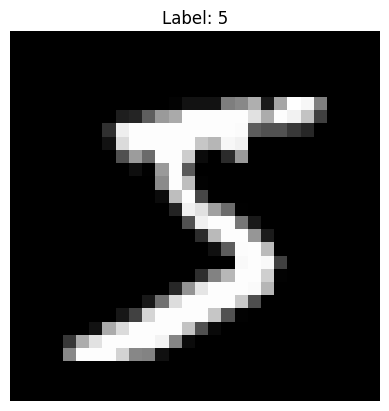

In [24]:
# define cnn model

# first we put 1 convo layer
import torch.nn as nn

conv1 = nn.Conv2d(1, 16, 3)  # 1 input channel, 4 filters, 3x3 kernel

output = conv1(image.unsqueeze(0))  # add batch dimension

print("Output shape:", output.shape)

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()




In [25]:
from re import X
conv1 = nn.Conv2d(1,16,3)
conv2 = nn.Conv2d(16,32,3)

x=image.unsqueeze(0)

# relu and con1
x=F.relu( conv1(x))


# pooling
x=F.max_pool2d(x,2)


# con2
x=F.relu( conv2(x))
# poolin 2nd time
x=F.max_pool2d(x,2)



print(x.shape)
# now we change it to flaten the tensor
x=x.view(x.size(0),-1)
x.shape

# linear models
lm1=nn.Linear(800,128)
lm2=nn.Linear(128,10)



x=lm1(x)
x=F.relu(x)
x=lm2(x)

print(x)

# plt.imshow(image.squeeze(), cmap="gray")
# plt.title(f"Label: {label}")
# plt.axis("off")
# plt.show()
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(4, 8, figsize=(12,6))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(x[0, i].detach(), cmap="gray")
#     ax.axis("off")

# plt.tight_layout()
# plt.show()

predicted = torch.argmax(x, dim=1)
print(predicted)


torch.Size([1, 32, 5, 5])
tensor([[-0.2032, -0.0272, -0.0424,  0.0889, -0.0511,  0.1220,  0.0067,  0.0341,
         -0.0106, -0.0398]], grad_fn=<AddmmBackward0>)
tensor([5])


In [26]:
from matplotlib.colors import cnames
# lets make the project now
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix

transform=transforms.ToTensor()


# train data
train_data=datasets.MNIST(root="./cnn_data",train=True,download=True,transform=transform)

# test_data
test_data=datasets.MNIST(root="./cnn_data",train=False ,download=True,transform=transform)

train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False)




class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)

        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self,x):

        x=F.relu(self.conv1(x))
        x=F.max_pool2d  (x,2)

        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2)

        x=x.view(x.size(0),-1)

        x=F.relu(self.fc1(x))
        x=self.fc2(x)

        return x

model=CNN()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

epochs=5

# loop of the train and test(eval)
epochs_loss=[]

for epoch in range(epochs):
# this set is for train
    model.train()
    average_loss=0
    for i,(image ,label) in enumerate(train_loader):
        output=model(image)
        loss=loss_fn(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        average_loss+=loss.item()
    print()    
    print("this result is for loss calculation")
    print(f"the average loss of epoch {epoch+1} is {average_loss/len(train_loader)}")
    epochs_loss.append(average_loss/len(train_loader))
# this is the set for valuation
    model.eval()
    val_correct=0
    val_total=0
    with torch.no_grad():
        for image , label in val_loader:
            output=model(image)
            _,predicted=torch.max(output,1) 
            val_total+=label.size(0)
            val_correct+=(predicted==label).sum().item()
    val_accuracy=100*val_correct/val_total

    print()
    print("this result is for valuation")
    print(f"epoch{epoch+1} total is {total}")
    print(f"epoch{epoch+1} correct is {correct}")
    print(f"the accuracy of epoch {epoch+1} is {val_accuracy} ")
# this set is for test 
    correct=0
    total=0
    model.eval()
    with torch.no_grad():
        for i,(image ,label) in enumerate(test_loader):
            output=model(image)
            _,predicted=torch.max(output,1)
            total+=label.size(0)
            correct+=(predicted==label).sum().item()

    print()
    print("this result is for test")        
    print(f"epoch{epoch+1} total is {total}")
    print(f"epoch{epoch+1} correct is {correct}")
    print(f"epoch{epoch+1} accuracy is {100*correct/total}")







this result is for loss calculation
the average loss of epoch 1 is 0.1813192123219371

this result is for valuation
epoch1 total is 10000
epoch1 correct is 9885
the accuracy of epoch 1 is 97.50833333333334 

this result is for test
epoch1 total is 10000
epoch1 correct is 9729
epoch1 accuracy is 97.29

this result is for loss calculation
the average loss of epoch 2 is 0.05637711170127926

this result is for valuation
epoch2 total is 10000
epoch2 correct is 9729
the accuracy of epoch 2 is 98.74166666666666 

this result is for test
epoch2 total is 10000
epoch2 correct is 9855
epoch2 accuracy is 98.55

this result is for loss calculation
the average loss of epoch 3 is 0.04061561444477023

this result is for valuation
epoch3 total is 10000
epoch3 correct is 9855
the accuracy of epoch 3 is 99.00833333333334 

this result is for test
epoch3 total is 10000
epoch3 correct is 9846
epoch3 accuracy is 98.46

this result is for loss calculation
the average loss of epoch 4 is 0.029741836403050306


[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    2 1021    1    0    0    0    7    0    0]
 [   0    0    3  994    0   11    0    0    1    1]
 [   0    0    2    0  971    0    3    1    0    5]
 [   2    0    0    4    0  883    2    0    1    0]
 [   5    2    0    1    1    1  945    0    3    0]
 [   0    2    0    0    0    0    0 1025    0    1]
 [   3    0    3    0    0    0    1    1  963    3]
 [   0    2    0    0    4    7    0    7    0  989]]


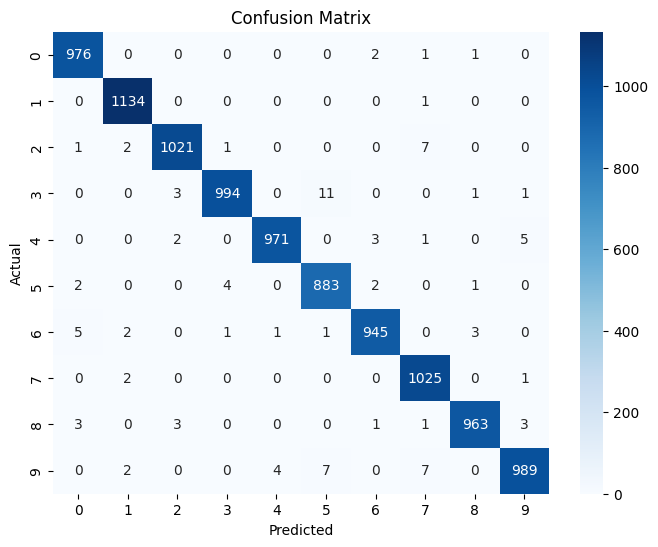

In [27]:

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds)
print(cm)

import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


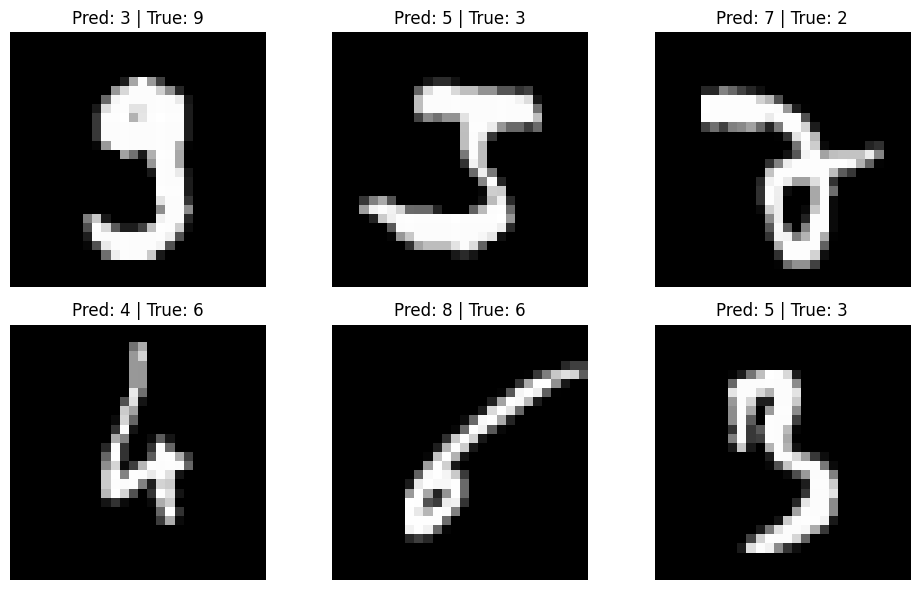

In [28]:
# show some of the wrong predictions
wrong_image=[]
wrong_preds=[]
wrong_label=[]
model.eval()
with torch.no_grad():

    for image, labels in train_loader:
        output=model(image)
        _,predicted=torch.max(output,1)
        wrong_mask=predicted!=labels

        wrong_image.extend(image[wrong_mask])
        wrong_preds.extend(predicted[wrong_mask])
        wrong_label.extend(labels[wrong_mask])


plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(wrong_image[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {wrong_preds[i]} | True: {wrong_label[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

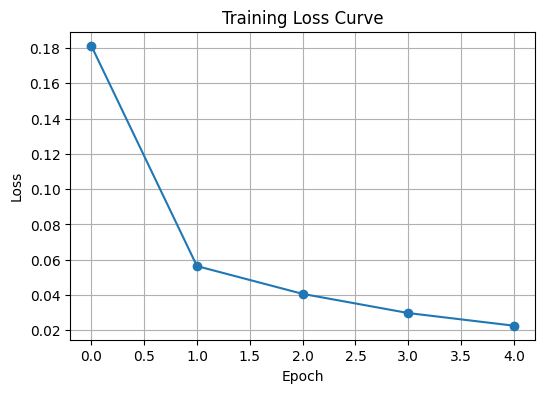

In [29]:
plt.figure(figsize=(6,4))
plt.plot(epochs_loss, marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [30]:
# save the parameters

torch.save(model.state_dict(), "mnist_cnn.pth")
print("Model saved successfully.")
state = torch.load("mnist_cnn.pth")
print(state.keys())


Model saved successfully.
odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


the accuracy of 
